In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/pic"

/content/drive/MyDrive/pic


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = ResNet50(include_top = True,
                  weights = "imagenet",
                  input_tensor = None,
                  input_shape = None,
                  pooling = None,
                  classes = 1000)

102981632/102967424 [==============================] - 0s 0us/step


In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
model.trainable = False
model = Sequential([model,
                     Dense(2, activation = 'sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "/content/drive/MyDrive/pic/train"
valid_dir = "/content/drive/MyDrive/pic/validation"

train = ImageDataGenerator(rescale = 1./255,
                            rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1
)

train_generator = train.flow_from_directory(train_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 1,
                                             shuffle = True,
                                             class_mode = "categorical")

Found 385 images belonging to 2 classes.


In [16]:
valid = ImageDataGenerator(rescale = 1.0/255.0)
vaild_generator = valid.flow_from_directory(valid_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 7,
                                             shuffle = True,
                                             class_mode = "categorical")

history = model.fit(train_generator, epochs = 10, validation_data = vaild_generator, verbose = 2)

Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 4s - loss: 0.6923 - accuracy: 0.5273 - val_loss: 0.6934 - val_accuracy: 0.5000 - 4s/epoch - 283ms/step
Epoch 2/10
13/13 - 3s - loss: 0.6923 - accuracy: 0.5273 - val_loss: 0.6934 - val_accuracy: 0.5000 - 3s/epoch - 215ms/step
Epoch 3/10
13/13 - 3s - loss: 0.6922 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000 - 3s/epoch - 247ms/step
Epoch 4/10
13/13 - 3s - loss: 0.6923 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000 - 3s/epoch - 233ms/step
Epoch 5/10
13/13 - 3s - loss: 0.6922 - accuracy: 0.5273 - val_loss: 0.6934 - val_accuracy: 0.5000 - 3s/epoch - 266ms/step
Epoch 6/10
13/13 - 3s - loss: 0.6921 - accuracy: 0.5273 - val_loss: 0.6934 - val_accuracy: 0.5000 - 3s/epoch - 222ms/step
Epoch 7/10
13/13 - 3s - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6934 - val_accuracy: 0.5000 - 3s/epoch - 216ms/step
Epoch 8/10
13/13 - 3s - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6934 - val_accuracy: 0.5000 - 3s/epo

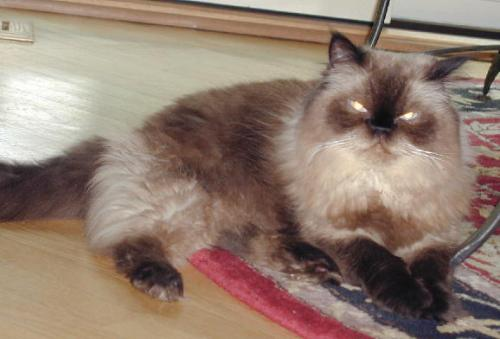

In [23]:
tes1 = ImageDataGenerator( rescale = 1.0/255. )
test_dat3 = tes1.flow_from_directory('/content/drive/MyDrive/pic/test1', batch_size=20, class_mode='binary', target_size=(100, 100))
y_pre = model.predict(test_dat3)
print((y_pre)*100)

#모델 학습률이 낮아서 값이 1인 강아지로 51퍼 예상함

Found 1 images belonging to 2 classes.
[[48.514942 51.54069 ]]


##데이터 확장

In [24]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
                             hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                                             input_shape=(224, 224, 3),
                                             trainable = False),
                             tf.keras.layers.Dense(2, activation = 'softmax')
])

In [25]:
train = ImageDataGenerator(rescale = 1./255,
                            rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1
)

train_generator = train.flow_from_directory(train_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 1,
                                             shuffle = True,
                                             class_mode = "categorical")

Found 385 images belonging to 2 classes.


In [26]:
valid = ImageDataGenerator(rescale = 1.0/255.0)
vaild_generator = valid.flow_from_directory(valid_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 7,
                                             shuffle = True,
                                             class_mode = "categorical")

Found 98 images belonging to 2 classes.


In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
history = model.fit(train_generator, epochs = 10, validation_data = vaild_generator, verbose = 2)

Epoch 1/10
13/13 - 14s - loss: 0.9595 - accuracy: 0.6727 - val_loss: 0.4596 - val_accuracy: 0.8469 - 14s/epoch - 1s/step
Epoch 2/10
13/13 - 3s - loss: 0.3826 - accuracy: 0.8675 - val_loss: 0.2995 - val_accuracy: 0.8673 - 3s/epoch - 238ms/step
Epoch 3/10
13/13 - 3s - loss: 0.2737 - accuracy: 0.8909 - val_loss: 0.2466 - val_accuracy: 0.9286 - 3s/epoch - 234ms/step
Epoch 4/10
13/13 - 3s - loss: 0.2182 - accuracy: 0.9143 - val_loss: 0.3006 - val_accuracy: 0.8980 - 3s/epoch - 234ms/step
Epoch 5/10
13/13 - 3s - loss: 0.1823 - accuracy: 0.9247 - val_loss: 0.2650 - val_accuracy: 0.9184 - 3s/epoch - 237ms/step
Epoch 6/10
13/13 - 3s - loss: 0.2103 - accuracy: 0.9221 - val_loss: 0.2614 - val_accuracy: 0.9082 - 3s/epoch - 237ms/step
Epoch 7/10
13/13 - 3s - loss: 0.1773 - accuracy: 0.9377 - val_loss: 0.2779 - val_accuracy: 0.9082 - 3s/epoch - 233ms/step
Epoch 8/10
13/13 - 3s - loss: 0.1700 - accuracy: 0.9247 - val_loss: 0.2327 - val_accuracy: 0.9082 - 3s/epoch - 234ms/step
Epoch 9/10
13/13 - 3s - l

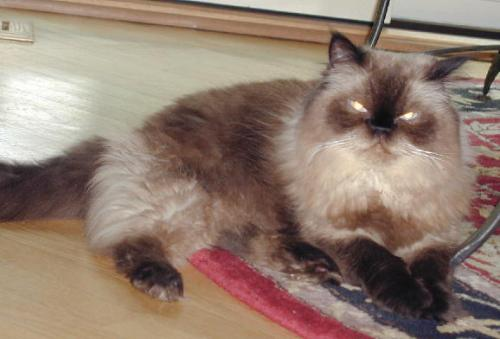

In [30]:
tes1 = ImageDataGenerator( rescale = 1.0/255. )
test_dat3 = tes1.flow_from_directory('/content/drive/MyDrive/pic/test1', batch_size=20, class_mode='binary', target_size=(100, 100))
y_pre = model.predict(test_dat3)
print((y_pre)*100)

##이번에는 완전한 고양이로 인식

Found 1 images belonging to 2 classes.
[[9.99998932e+01 1.03331266e-04]]
